## 빅데이터 기반 AI 응용 솔루션 개발자 전문과정

### 교과목명 : 선형대수학 및 통계학
- 평가일 : 21.7.30
- 성명 : 조경림
- 점수 : 77

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-dark')

Q1. 평균이 10, 표준편차가 3인 정규분포의 확률밀도함수를 그래프로 표현하세요.  
x축은 np.arange(0,20,0.1) 

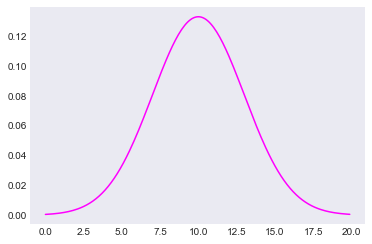

In [7]:
x = np.arange(0,20,0.1)

plt.plot(x, stats.norm.pdf(loc=10,scale=3, x=x), color='magenta')

Q2. 평균이 1, 표준편차가 2인 정규분포의 누적분포함수를 그래프로 표현하세요.  
x축 : np.arange(-3,8,0.1)

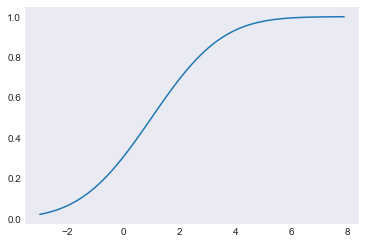

In [8]:
x1 = np.arange(-3,8,0.1)

plt.plot(x1, stats.norm.cdf(loc=1, scale=2, x=x1))

Q3. "dataset/5_2_fm.csv"을 df1으로 불러와서 다음사항을 수행하세요.
- df1을 df2 이름으로 복사한 후 df2의 species의 A, B를 C,D로 변경하세요.
- df의 length를 species가 C인 것은 2배로 d인 것은 3배로 변경하여 df1과 df2를 행방향으로 결합, df 생성 
- df를 species 칼럼을 기준으로 그룹별 평균과 표준편차를 산출

### 틀림! -10

In [159]:
df1 = pd.read_csv('/Users/joy/cakd3/stat/5_2_fm.csv')
df2 = df1.copy()
df2.replace({'A':'C', 'B':'D'}, inplace=True)
print(df2)
def func (x):
    if df2['species'] == 'C':
        return df2.length.apply(lambda x : x*2)
    elif df2['speices'] =='D':
        return df2.length. apply(lambda x : x*3)

# df2['species']=df2.species.apply(lambda x : func(x))


  species  length
0       C       2
1       C       3
2       C       4
3       D       6
4       D       8
5       D      10


Q4. "./dataset/5_2_shoes.csv" 을 데이터프레임으로 불러와서 아래작업을 수행하세요.
- 4행 3열을 복사 후 추가하여 8행 3열로 작성하세요. 
- 피벗테이블을 이용, 교차분석표를 만드세요(values='sales',aggfunc='sum', index= 'store', columns = 'color')

In [161]:
import pandas as pd
shoes = pd.read_csv("/Users/joy/cakd3/시험문제/5_2_shoes.csv")

shoes1=shoes.copy()
print(shoes1)

pd.pivot_table(data=shoes, values='sales',aggfunc='sum', index= 'store', columns = 'color')

   store color  sales
0  tokyo  blue     10
1  tokyo   red     15
2  osaka  blue     13
3  osaka   red      9


color,blue,red
store,,
osaka,13,9
tokyo,10,15


Q5. 주어진 fish 데이터로 다음사항을 수행하세요.
- 모평균의 점추정, 모분산의 점추정
- 자유도, 표준오차
- 신뢰구간 계산 

In [162]:
df = pd.read_csv('/Users/joy/cakd3/시험문제/5_7_fl.csv')
fish = df['length']
print(fish)

# 모평균의 점추정
mu = np.mean(fish).round(2)
sigma = np.var(fish, ddof=1).round(2)
print('\n','모평균:',mu,'모분산:',sigma,'\n')
dof = len(fish)-1
# 자유도, 표준오차
r_sigma = np.std(fish, ddof=1)
se = r_sigma/np.sqrt(len(fish))
se = se.round(2)
print('자유도:',dof,'표준오차:',se)
# 신뢰구간 계산
interval = stats.t.interval(alpha=0.95, df=dof, loc=mu, scale=se)
print('신뢰구간 계산: ', interval)

0    4.352982
1    3.735304
2    5.944617
3    3.798326
4    4.087688
5    5.265985
6    3.272614
7    3.526691
8    4.150083
9    3.736104
Name: length, dtype: float64

 모평균: 4.19 모분산: 0.68 

자유도: 9 표준오차: 0.26
신뢰구간 계산:  (3.6018391376873424, 4.778160862312658)


Q6. 'dataset/titanic3.csv'을 불러와서 pclass 와 sex 칼럼을 각각 인덱스, 칼럼으로 하고 values는 survived, 함수는 mean을 적용하여 pivot_table을 만든 후 히트맵으로 시각화 및 인사이트를 기술하세요

In [57]:
titanic = pd.read_csv('/Users/joy/cakd3/시험문제/titanic3.csv')
titanic.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


<AxesSubplot:xlabel='sex', ylabel='pclass'>

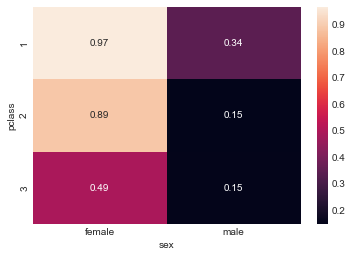

In [62]:
df = pd.pivot_table(data=titanic,
              index ='pclass',
              columns = 'sex',
              values = 'survived',
              aggfunc = 'mean')

sns.heatmap(df,
           annot=True,
           cbar=True)

# 등급이 높을수록 살 가능성이 높다
# 여성일수록 살 가능성이 높다
# 2,3등급의 남성은 거의 살아남지 못했다.

Q7. 4행 5열 배열과 5행 3열 배열을 생성하여 a, b 이름으로 저장 후 a, b의 행렬 곱을 구하세요. (출력 결과는 4행 3열 배열)

In [69]:
a = np.arange(20).reshape(4,5)
b = np.arange(15).reshape(5,3)
c = a.dot(b)
print('a,b 행렬의 곱:','\n')
c

a,b 행렬의 곱: 



array([[ 90, 100, 110],
       [240, 275, 310],
       [390, 450, 510],
       [540, 625, 710]])

## 부분틀림 -3
Q8. Q. fish_multi 데이터프레임으로 다음을 수행하세요.
- A, B 두개의 그룹의 Box Plot을 그리고 이상치를 구하세요.
- 이상치를 제거한 후 Box Plot으로 이상치 여부를 확인하세요.
- 바이올린 플롯을 표현하세요.

In [163]:
import pandas as pd
fish_multi = pd.read_csv("/Users/joy/cakd3/visualization/dataset/4_fm2.csv")
fish_multi.iloc[5,1] = 10
fish_multi.iloc[10,1] = 2
print(fish_multi)

   species  length
0        A       2
1        A       3
2        A       3
3        A       4
4        A       4
5        A      10
6        A       4
7        A       5
8        A       5
9        A       6
10       B       2
11       B       6
12       B       6
13       B       7
14       B       7
15       B       7
16       B       7
17       B       8
18       B       8
19       B       9


-2.0 10.0
0     2.0
1     3.0
2     3.0
3     4.0
4     4.0
6     4.0
7     5.0
8     5.0
9     6.0
10    6.0
11    6.0
12    6.0
13    7.0
14    7.0
15    7.0
16    7.0
17    8.0
18    8.0
19    9.0
Name: length, dtype: float64
None


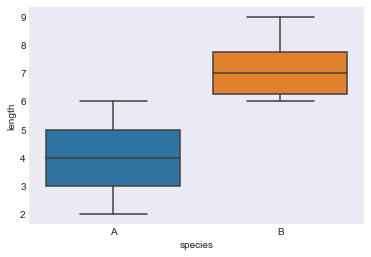

In [118]:
sns.boxplot(data=fish_multi, x='species', y='length')
Q1 = stats.scoreatpercentile(fish_multi['length'], 25)
Q3 = stats.scoreatpercentile(fish_multi['length'], 75)
IQR = Q3 = Q1
uw = Q1 - IQR*1.5
lw = Q3 + IQR*1.5
print(uw, lw)
print(fish_multi['length'])
fish_multi2 = fish_multi.drop(fish_multi.index[5])
fish_multi3 = fish_multi.fillna(method='ffill', inplace =True)
print(fish_multi3)

<AxesSubplot:xlabel='species', ylabel='length'>

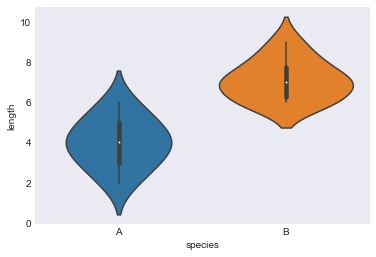

In [119]:
sns.violinplot(x='species', y='length', data=fish_multi)

Q9. df_auto mpg 컬럼과 weight 컬럼에 대하여 산점도, 회귀선, 히스토그램을 
그래프로 같이 표현하여 탐색 후 인사이트를 기술하세요.

In [120]:
import pandas as pd
df_auto = pd.read_excel('/Users/joy/cakd3/visualization/dataset/auto-mpg.xlsx')
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


<AxesSubplot:xlabel='Count', ylabel='weight'>

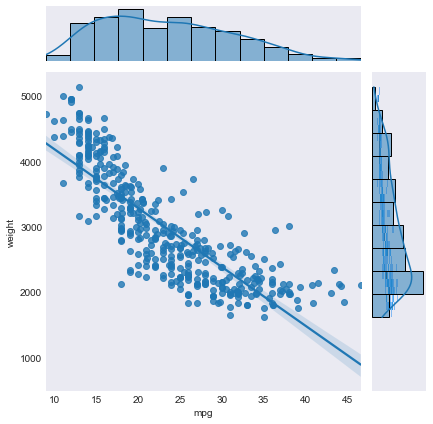

In [134]:
# 산점도, 회귀선, 히스토그램
import warnings
warnings.filterwarnings('ignore')
sns.jointplot(df_auto.mpg, df_auto.weight, kind='reg')
sns.histplot(x=df_auto['mpg'], y=df_auto['weight'], bins=30)

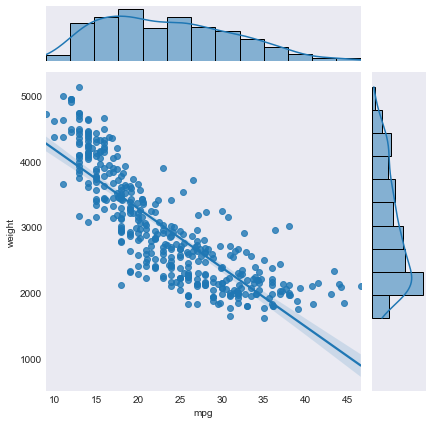

In [137]:
# 산점도, 회귀선
sns.jointplot(df_auto.mpg, df_auto.weight, kind='reg')

<AxesSubplot:xlabel='mpg', ylabel='weight'>

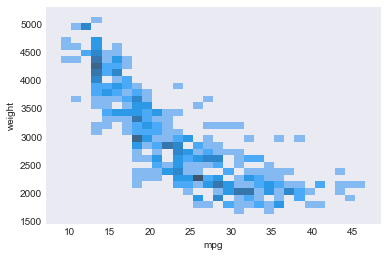

In [136]:
# 히스토그램
sns.histplot(x=df_auto['mpg'], y=df_auto['weight'], bins=30)

인사이트 : 히스토그램도 꽤 정확하지만, jointplot이 산점도와 회귀선을 둘 다 보여준다는 점에서 좀 더 정확하며
두 그래프를 통해 무게가 많이 나갈수록 연비가 낮고 무게가 적게 나갈수록 연비가 높은 것을 확인할 수 있다. 
히스토그램의 경우에는 색의 진하기를 통해 분포 정도를 파악할 수 있고, jointplot의 경우는 점의 갯수와 bar graph에 따라서 파악할 수 있었다. 

### 틀림 - 10
Q10. 샘플사이즈가 크면 불편분산은 모분산에 가까워진다는 것을 그래프로 증명하세요. 단, 모분산은 아래 모집단으로 부터 도출된다.

In [143]:
population = stats.norm(loc = 4, scale = 0.8)

In [152]:
def cal(size, n_trial):
    array = np.zeros(n_trial)
    for i in range(n_trial):
        array[i] = population.rvs(size=size).std()
    return array

In [153]:
s10 = cal(size=10, n_trial=1000)
df10 =pd.DataFrame({'sample mean': s10,
                  'size':np.tile('s10',1000)})
s20 = cal(size=20, n_trial=1000)
df20 = pd.DataFrame({'sample mean':s20,
                  'size':np.tile('s20',1000)})
s30 = cal(size=30, n_trial=1000)
df30 = pd.DataFrame({'sample mean': s30,
                   'size':np.tile('s30',1000)})

df = pd.concat([df10, df20, df30])
df

,sample mean,size
0,0.857295,s10
1,0.656558,s10
2,0.858873,s10
3,1.469312,s10
4,0.959968,s10
...,...,...
995,0.704181,s30
996,0.725704,s30
997,0.802508,s30
998,0.837511,s30


<AxesSubplot:xlabel='size', ylabel='sample mean'>

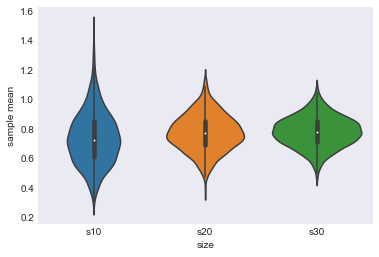

In [154]:
sns.violinplot(x='size',y='sample mean', data=df)